In [ ]:
# Importing the required libaries
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date

# Setting up a connection to my SQL Server instance and database.
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-8RF26DD\KALAIVANI1;'
                      'Database=AdventureWorks2019;'
                      'Trusted_Connection=yes;')   

In [ ]:
#1.What is the regional sales in the best performing country?

# displaying the region wise sales from all countries ,sales view from ssms

sales_region = pd.read_sql_query('SELECT * FROM sales', conn)

sales_region

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Region,country,Sales_in_mil
0,Northwest,US,7.89
1,Northeast,US,2.40
2,Central,US,3.07
3,Southwest,US,10.51
4,Southeast,US,2.54
5,Canada,CA,6.77
6,France,FR,4.77
7,Germany,DE,3.81
8,Australia,AU,5.98
9,United Kingdom,GB,5.01


In [ ]:
# Grouping the country to plot countrywise sales

best_country_sales = sales_region.groupby('country')[['Sales_in_mil']].sum()

best_country_sales


,Sales_in_mil
country,
AU,5.98
CA,6.77
DE,3.81
FR,4.77
GB,5.01
US,26.41


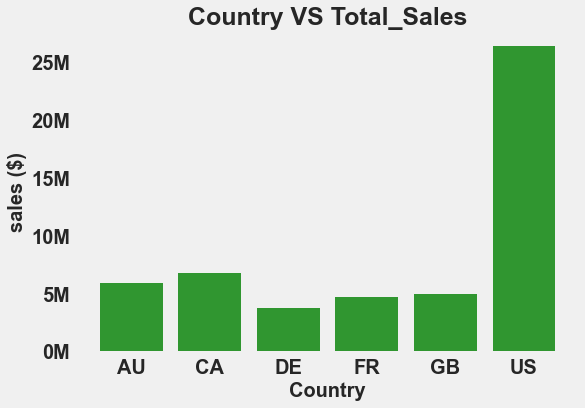

In [ ]:
#Visualisation of total sales by countrywise

fig,ax=plt.subplots()

best_country_sales1 = ax.bar(best_country_sales.index, best_country_sales['Sales_in_mil'], color = 'green', alpha = 0.8)

plt.rcParams["font.weight"] = "bold"

plt.rcParams["axes.labelweight"] = "bold"

plt.xlabel('Country',fontsize=20,fontweight='bold')

plt.ylabel('sales ($)',fontsize=20,fontweight='bold')

plt.yticks([0,5,10,15,20,25],['0M','5M','10M','15M','20M','25M'])

plt.yticks(fontsize=20)

plt.xticks(fontsize=20)

plt.title('Country VS Total_Sales',fontsize=25,fontweight='bold')

plt.style.use('fivethirtyeight')

plt.grid(False)

fig.savefig('Country VS Total_Sales')

plt.show()

In [ ]:
#Filtering best performing country using max

best_country_max=best_country_sales.loc[best_country_sales['Sales_in_mil'] == best_country_sales['Sales_in_mil'].max()]

best_country_max



,Sales_in_mil
country,
US,26.41


In [ ]:
#Filtering best performing country regions

best_country_regions = sales_region.loc[sales_region['country'] == best_country_max.index.values[0]]

best_country_regions

,Region,country,Sales_in_mil
0,Northwest,US,7.89
1,Northeast,US,2.40
2,Central,US,3.07
3,Southwest,US,10.51
4,Southeast,US,2.54


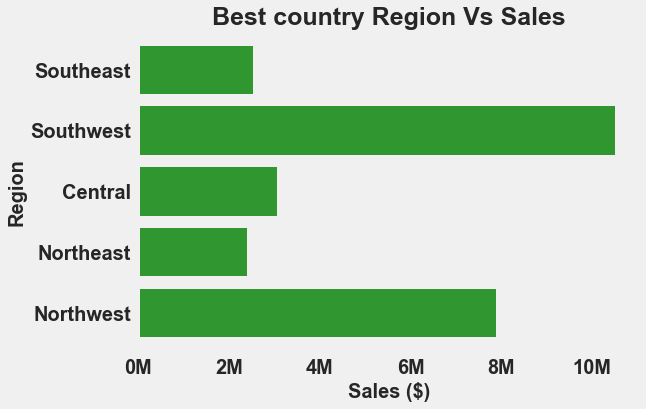

In [ ]:
#Visualisation of best perfoming country regions VS sales

fig,ax=plt.subplots()

best_country_regions1=plt.barh(best_country_regions.Region,best_country_regions.Sales_in_mil,color='green',alpha=0.8)

plt.rcParams["font.weight"] = "bold"

plt.rcParams["axes.labelweight"] = "bold"

plt.xlabel('Sales ($)',fontsize=20,fontweight='bold')

plt.ylabel('Region',fontsize=20,fontweight='bold')

plt.yticks(fontsize=20)

plt.xticks(fontsize=20)

plt.xticks([0,2,4,6,8,10],['0M','2M','4M','6M','8M','10M'])

plt.title('Best country Region Vs Sales',fontsize=25,fontweight='bold')

plt.style.use('fivethirtyeight')

plt.grid(False)

fig.savefig('Country VS Total_Sales')

plt.show()



In [ ]:
#2.What is the relationship between annual leave taken and bonus?

#Annual leave and bonus df from view leave_bonus


Annual_bonus = pd.read_sql_query('SELECT * FROM leave_bonus', conn)
Annual_bonus

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Annual_leave_hrs,bonus
0,14,0.0
1,38,4100.0
2,27,2000.0
3,24,2500.0
4,33,500.0
5,29,6700.0
6,22,5000.0
7,26,3550.0
8,31,5000.0
9,23,3500.0


[[1.         0.38210746]
 [0.38210746 1.        ]]


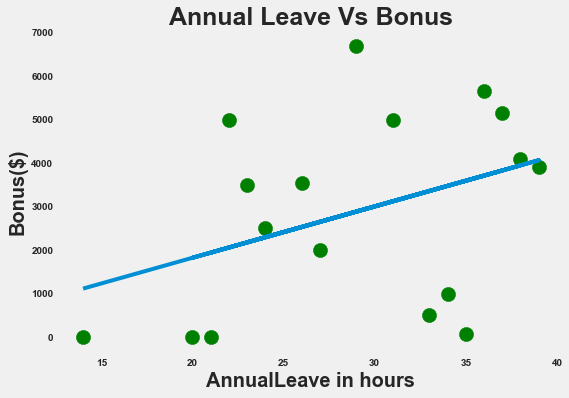

In [ ]:
#visualisation of annual leave Vs bonus

fig,ax=plt.subplots()

Leave_bonus1=plt.scatter(Annual_bonus['Annual_leave_hrs'],Annual_bonus['bonus'],color='green',s=200)

plt.rcParams["font.weight"] = "bold"

plt.rcParams["axes.labelweight"] = "bold"

plt.xlabel('AnnualLeave in hours',fontsize=20,fontweight='bold')

plt.ylabel('Bonus($)',fontsize=20,fontweight='bold')

plt.title('Annual Leave Vs Bonus',fontsize=25,fontweight='bold')

plt.style.use('fivethirtyeight')

plt.grid(False)

#Adding Trendline to show what the correlation between the variables is.

z = np.polyfit(Annual_bonus['Annual_leave_hrs'],Annual_bonus['bonus'], 1)
p = np.poly1d(z)

plt.plot(Annual_bonus['Annual_leave_hrs'], p(Annual_bonus['Annual_leave_hrs']))

#Calculating Correlation coefficient to show exact correlation of variables

Correlation = np.corrcoef(Annual_bonus['Annual_leave_hrs'], Annual_bonus['bonus'])
print(Correlation)

#The correlation coefficient is shown to be 0.38

fig.savefig('Country VS Total_Sales')

plt.show()

In [ ]:
#3.What is the relationship between Country and Revenue?

#country ,Total revenue, Avg revenue from view revenue_country1


revenue_country = pd.read_sql_query('SELECT * FROM revenue_country1', conn)

#sorting Total_annual_revenue_mil by ascending order

revenue_country.sort_values(by=['Total_annual_revenue_mil'], inplace=True, ascending=True)

revenue_country

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,country,Total_stores,Total_annual_revenue_mil,Avg_annual_revenue
2,Germany,40,5.90,147500.0000
0,Australia,40,6.42,160500.0000
3,France,40,6.65,166250.0000
4,United Kingdom,40,6.80,170000.0000
1,Canada,115,18.04,156869.5652
5,United States,437,68.98,157848.9702


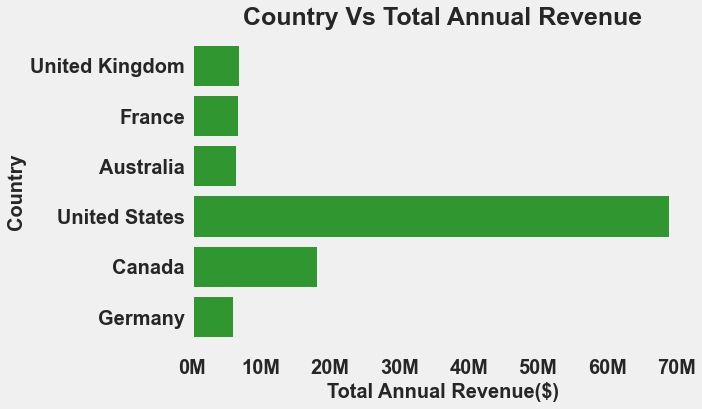

In [ ]:
#visualisation of Country Vs Total Revenue

fig,ax=plt.subplots()

country_revenue2=plt.barh(revenue_country.country,revenue_country.Total_annual_revenue_mil,color='green',alpha=0.8)

plt.rcParams["font.weight"] = "bold"

plt.rcParams["axes.labelweight"] = "bold"

plt.yticks(fontsize=20)

plt.xticks(fontsize=20)

plt.xlabel('Total Annual Revenue($)',fontsize=20,fontweight='bold')

plt.ylabel('Country',fontsize=20,fontweight='bold')

plt.xticks([0,10,20,30,40,50,60,70],['0M','10M','20M','30M','40M','50M','60M','70M'])

plt.title('Country Vs Total Annual Revenue',fontsize=25,fontweight='bold')

plt.style.use('fivethirtyeight')

plt.grid(False)

fig.savefig('Country VS Total_Sales')

plt.show()


In [ ]:
#sorting Avg_annual_revenue by ascending order

revenue_country.sort_values(by=['Avg_annual_revenue'], inplace=True, ascending=True)
revenue_country

,country,Total_stores,Total_annual_revenue_mil,Avg_annual_revenue
2,Germany,40,5.90,147500.0000
1,Canada,115,18.04,156869.5652
5,United States,437,68.98,157848.9702
0,Australia,40,6.42,160500.0000
3,France,40,6.65,166250.0000
4,United Kingdom,40,6.80,170000.0000


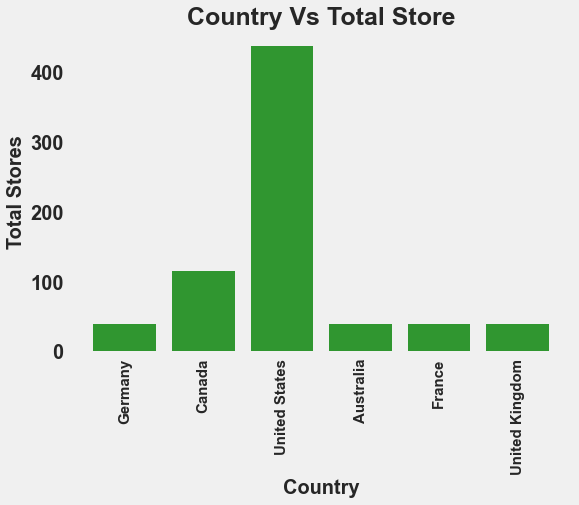

In [ ]:
#visualisation of Country Vs Total Stores
fig,ax=plt.subplots()

revenue_country1=plt.bar(revenue_country.country,revenue_country.Total_stores,color='green',alpha=0.8)

plt.rcParams["font.weight"] = "bold"

plt.rcParams["axes.labelweight"] = "bold"

plt.yticks(fontsize=20)

plt.xticks(fontsize=15,rotation=90)

plt.xlabel('Country',fontsize=20,fontweight='bold')

plt.ylabel('Total Stores',fontsize=20,fontweight='bold')

plt.title('Country Vs Total Store',fontsize=25,fontweight='bold')

plt.style.use('fivethirtyeight')

plt.grid(False)


fig.savefig('Country VS Total_Sales')

plt.show()

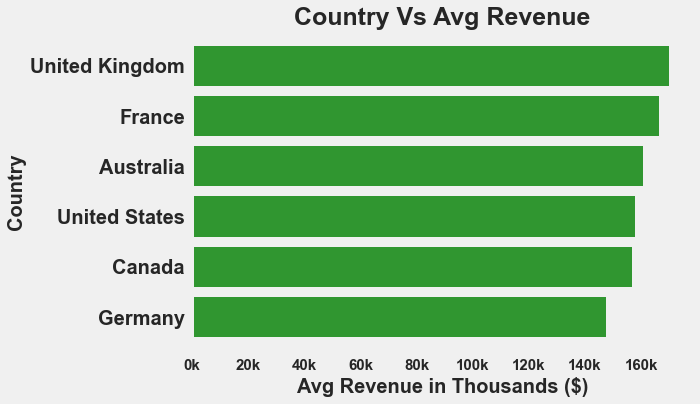

In [ ]:
#visualisation of Country Vs Avg Revenue

fig,ax=plt.subplots()

revenue_country2=plt.barh(revenue_country.country,revenue_country.Avg_annual_revenue,color='green',alpha=0.8)

plt.rcParams["font.weight"] = "bold"

plt.rcParams["axes.labelweight"] = "bold"

plt.yticks(fontsize=20)

plt.xticks([0,20000,40000,60000,80000,100000,120000,140000,160000],['0k','20k','40k','60k','80k','100k','120k','140k','160k'],fontsize=15)

plt.xlabel('Avg Revenue in Thousands ($)',fontsize=20,fontweight='bold')

plt.ylabel('Country',fontsize=20,fontweight='bold')

plt.title('Country Vs Avg Revenue',fontsize=25,fontweight='bold')

plt.style.use('fivethirtyeight')

plt.grid(False)

fig.savefig('Country VS Total_Sales')

plt.show()

In [ ]:

#4.What is the relationship between sick leave and Job Title?

# Jobtitle and sickleave df from view job_leave
#Filter the organization level 1

job_sickleave = pd.read_sql_query('SELECT * FROM job_leave', conn)

Job_sickleave=job_sickleave.query("OrganizationLevel==1",inplace=True)

job_sickleave.sort_values(by=['Avg_Sick_Leave'], inplace=True, ascending=True)

job_sickleave



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,JobTitle,Avg_Sick_Leave,OrganizationLevel
1,Chief Financial Officer,20,1.0
4,Vice President of Engineering,20,1.0
6,Vice President of Sales,25,1.0
3,Marketing Manager,40,1.0
2,Information Services Manager,52,1.0
5,Vice President of Production,52,1.0


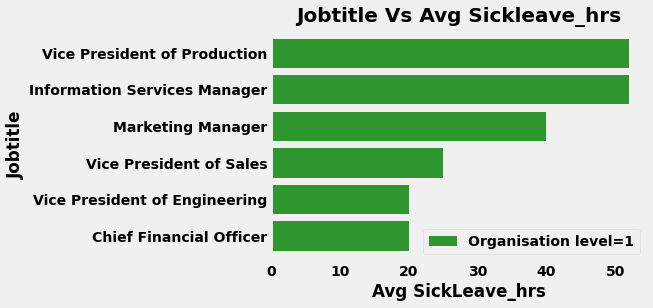

In [ ]:
#plot the organization level 1 of avg sick leave and Jobtitle

fig,ax=plt.subplots()

Job_sickleave2=ax.barh(job_sickleave.JobTitle,job_sickleave.Avg_Sick_Leave,color='green',label='Organisation level=1',alpha=0.8)

ax.set_xlabel('Avg SickLeave_hrs',fontweight='bold')

ax.set_ylabel('Jobtitle',fontweight='bold')

ax.set_title('Jobtitle Vs Avg Sickleave_hrs',fontsize=20,fontweight='bold')

plt.style.use('fivethirtyeight')

plt.grid(False)

plt.legend()

plt.show()

fig.savefig('Jobtitle Vs Avg Sickleave.png')




In [ ]:
#Filter the organization level 1

job_sickleave2 = pd.read_sql_query('SELECT * FROM job_leave', conn)

Job_sickleave2=job_sickleave2.query("OrganizationLevel==2",inplace=True)

job_sickleave2.sort_values(by=['Avg_Sick_Leave'], inplace=True, ascending=True)

job_sickleave2

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,JobTitle,Avg_Sick_Leave,OrganizationLevel
11,Engineering Manager,21,2.0
20,North American Sales Manager,27,2.0
21,Pacific Sales Manager,30,2.0
12,European Sales Manager,30,2.0
16,Marketing Assistant,40,2.0
22,Production Control Manager,41,2.0
18,Master Scheduler,42,2.0
17,Marketing Specialist,42,2.0
15,Human Resources Manager,47,2.0
14,Finance Manager,47,2.0


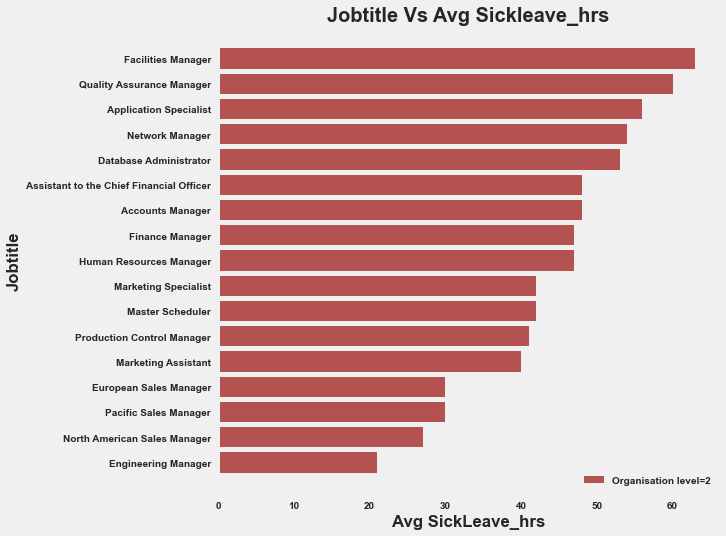

In [ ]:
#plot the organization level 2 of avg sick leave and Jobtitle

fig,ax=plt.subplots()

Job_sickleave2=ax.barh(job_sickleave2.JobTitle,job_sickleave2.Avg_Sick_Leave,color='brown',label='Organisation level=2',alpha=0.8)

ax.set_xlabel('Avg SickLeave_hrs',fontweight='bold')

ax.set_ylabel('Jobtitle',fontweight='bold')

ax.set_title('Jobtitle Vs Avg Sickleave_hrs',fontsize=20,fontweight='bold')

plt.style.use('fivethirtyeight')

fig.set_size_inches([8,8])

plt.grid(False)

plt.legend()

plt.show()

fig.savefig('Jobtitle Vs Avg Sickleave.png')

In [ ]:
#Filter the organization level 3

job_sickleave3 = pd.read_sql_query('SELECT * FROM job_leave', conn)

Job_sickleave3 = job_sickleave3.query("OrganizationLevel==3",inplace=True)

job_sickleave3.sort_values(by=['Avg_Sick_Leave'], inplace=True, ascending=True)

job_sickleave3

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,JobTitle,Avg_Sick_Leave,OrganizationLevel
47,Senior Design Engineer,21,3.0
28,Design Engineer,22,3.0
45,Sales Representative,35,3.0
35,Production Supervisor - WC20,40,3.0
46,Scheduling Assistant,43,3.0
43,Recruiter,44,3.0
41,Purchasing Manager,44,3.0
27,Benefits Specialist,45,3.0
31,Human Resources Administrative Assistant,46,3.0
24,Accountant,49,3.0


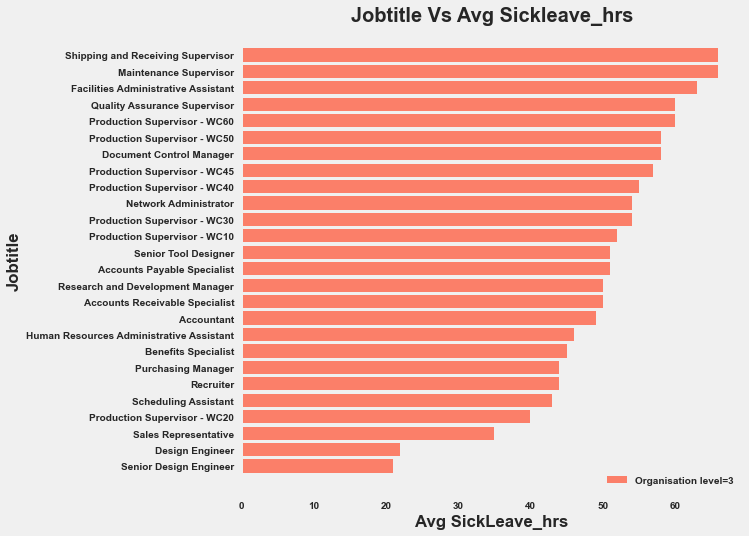

In [ ]:
#plot the organization level 3 of avg sick leave and Jobtitle

fig,ax=plt.subplots()

Job_sickleave3=ax.barh(job_sickleave3.JobTitle,job_sickleave3.Avg_Sick_Leave,color='tomato',label='Organisation level=3',alpha=0.8)

ax.set_xlabel('Avg SickLeave_hrs',fontweight='bold')

ax.set_ylabel('Jobtitle',fontweight='bold')

ax.set_title('Jobtitle Vs Avg Sickleave_hrs',fontsize=20,fontweight='bold')

plt.style.use('fivethirtyeight')

fig.set_size_inches([8,8])

plt.grid(False)

plt.legend()

plt.show()

fig.savefig('Jobtitle Vs Avg Sickleave.png')

In [ ]:
#Filter the organization level 4

job_sickleave4 = pd.read_sql_query('SELECT * FROM job_leave', conn)

Job_sickleave4 = job_sickleave4.query("OrganizationLevel==4",inplace=True)

job_sickleave4.sort_values(by=['Avg_Sick_Leave'], inplace=True, ascending=True)

job_sickleave4

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,JobTitle,Avg_Sick_Leave,OrganizationLevel
67,Tool Designer,24,4.0
55,Production Technician - WC20,25,4.0
60,Production Technician - WC60,33,4.0
56,Production Technician - WC30,36,4.0
59,Production Technician - WC50,43,4.0
61,Purchasing Assistant,45,4.0
50,Buyer,47,4.0
57,Production Technician - WC40,49,4.0
63,Research and Development Engineer,51,4.0
51,Control Specialist,57,4.0


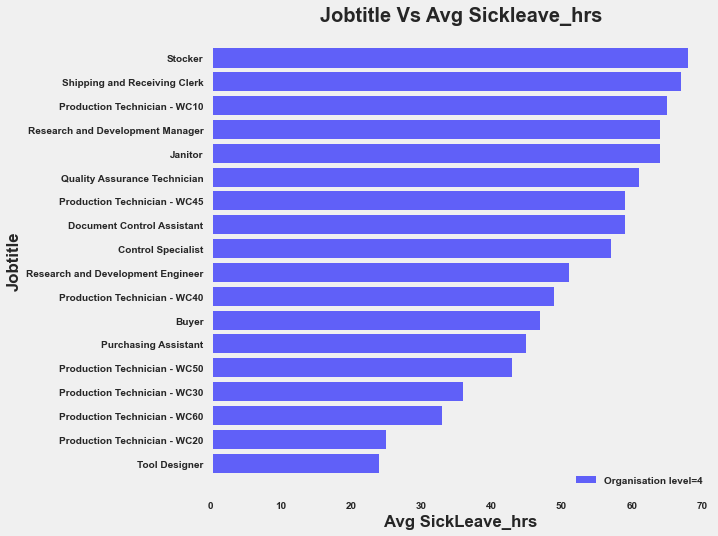

In [ ]:
#plot the organization level 3 of avg sick leave and Jobtitle

fig,ax=plt.subplots()

Job_sickleave4=ax.barh(job_sickleave4.JobTitle,job_sickleave4.Avg_Sick_Leave,color='blue',label='Organisation level=4',alpha=0.6)

ax.set_xlabel('Avg SickLeave_hrs',fontweight='bold')

ax.set_ylabel('Jobtitle',fontweight='bold')

ax.set_title('Jobtitle Vs Avg Sickleave_hrs',fontsize=20,fontweight='bold')

plt.style.use('fivethirtyeight')

fig.set_size_inches([8,8])

plt.grid(False)

plt.legend()

plt.show()

fig.savefig('Jobtitle Vs Avg Sickleave.png')

In [ ]:

#5.What is the relationship between store trading duration and revenue?

# yearopened , Annual Revenue from view revenue_trade
# Importing data from SQL Server by using 'Views'. View E stores the query for the fifth answer in SQL Server.
df = pd.read_sql_query('SELECT * FROM E', conn)
df

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,YearOpened,Average_Revenue,Num_of_Stores
0,1970,45.79,19
1,1971,115.79,19
2,1972,171.58,19
3,1973,30.00,6
4,1974,222.00,25
5,1975,120.80,25
6,1976,70.80,25
7,1977,225.00,12
8,1978,137.60,25
9,1979,199.20,25


In [ ]:
# Calculating the duration a store has been in existence by subtracting the current year from the year the store opened
df['duration'] = date.today().year- df['YearOpened']
df

,YearOpened,Average_Revenue,Num_of_Stores,duration
0,1970,45.79,19,52
1,1971,115.79,19,51
2,1972,171.58,19,50
3,1973,30.00,6,49
4,1974,222.00,25,48
5,1975,120.80,25,47
6,1976,70.80,25,46
7,1977,225.00,12,45
8,1978,137.60,25,44
9,1979,199.20,25,43


C:\Users\user\AppData\Local\Temp\ipykernel_22412\3743251345.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(['0K', '50K', '100K', '150K', '200K', '250K'])


<BarContainer object of 32 artists>

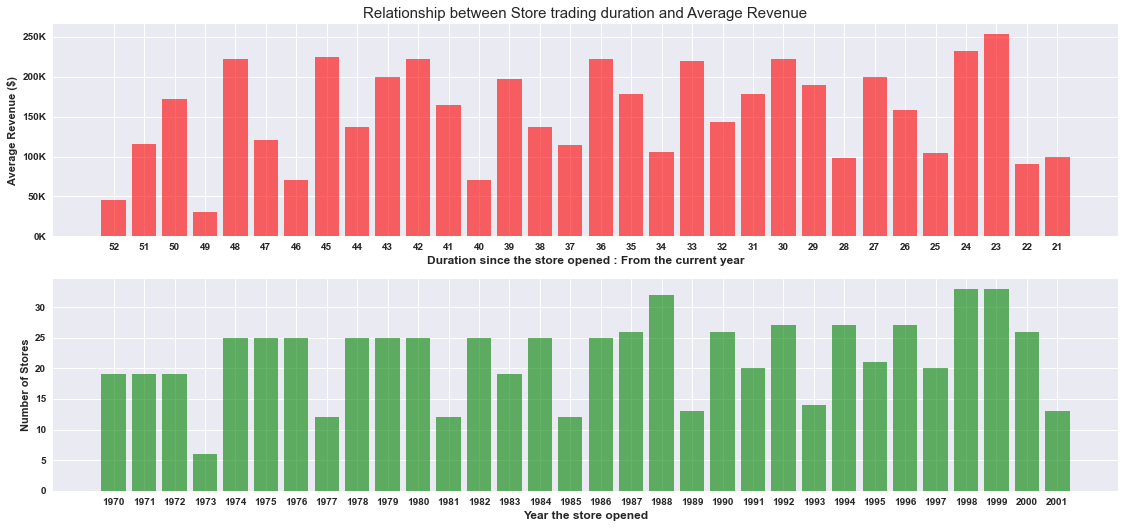

In [ ]:

# Visualising the relationship between annual revenue and years the stores are in existence.
# Visualising the relationship between the number of years since the first store opened and the number of stores opened every year.
fig,ax = plt.subplots(2,1, sharey = False)

Duration_Revenue = ax[0].bar(df['duration'],df['Average_Revenue'], color = 'red' , alpha = 0.6)

Year_Revenue = ax[1].bar(df['YearOpened'],df['Num_of_Stores'], color = 'green', alpha = 0.6)

ax[0].set_xticks(df['duration'])

ax[0].invert_xaxis()

ax[1].set_xticks(df['YearOpened'])

ax[0].set_yticklabels(['0K', '50K', '100K', '150K', '200K', '250K'])

ax[0].set_ylabel("Average Revenue ($)")

ax[1].set_ylabel("Number of Stores")

ax[0].set_xlabel('Duration since the store opened : From the current year', fontsize = 12)

ax[1].set_xlabel('Year the store opened', fontsize = 12)

ax[0].set_title('Relationship between Store trading duration and Average Revenue', fontsize = 15)

plt.style.use('seaborn')

fig.set_size_inches([17,8])

fig.savefig('Relationship between Store Trading Duration and Average Revenue.png')

Duration_Revenue

In [ ]:
#	6.What is the relationship between the size of the stores, number of employees and revenue?

# Size of the stores , Avg number of employees and Avg revenue from view F2

EmployeeSizeRevenue = pd.read_sql_query('select * from answer6', conn)
EmployeeSizeRevenue

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Size,Average_Revenue,Avg_num_employees
0,6000,30000.0,3
1,7000,30000.0,5
2,8000,30000.0,5
3,9000,30000.0,5
4,10000,30000.0,5
5,11000,30000.0,7
6,17000,80000.0,10
7,18000,80000.0,13
8,19000,80000.0,15
9,20000,80000.0,14


[[1.         0.94545654]
 [0.94545654 1.        ]]


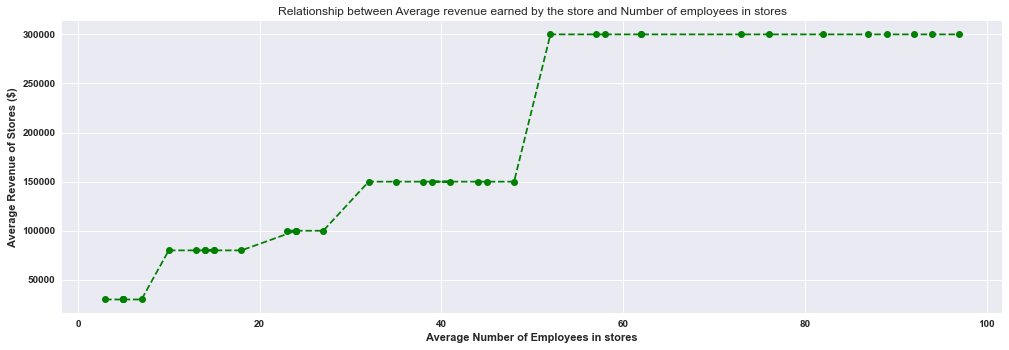

In [ ]:

# plot of Relationship between Avg revenue earned by store and no. of employees in stores

fig,ax = plt.subplots()

size_revenue = ax.plot(EmployeeSizeRevenue['Avg_num_employees'],EmployeeSizeRevenue['Average_Revenue'],color = 'green', linestyle ='--', marker = 'o')

ax.set_ylabel('Average Revenue of Stores ($)')

ax.set_xlabel('Average Number of Employees in stores')

ax.set_title('Relationship between Average revenue earned by the store and Number of employees in stores')

fig.savefig('Relationship between Average revenue earned by the store and Number of employees in stores.png')

fig.set_size_inches([15,5])

Correlation = np.corrcoef(EmployeeSizeRevenue['Avg_num_employees'], EmployeeSizeRevenue['Average_Revenue'])

print(Correlation)

z = np.polyfit(EmployeeSizeRevenue['Avg_num_employees'], EmployeeSizeRevenue['Average_Revenue'], 1)

p = np.poly1d(z)

size_revenue

[[1.         0.97165571]
 [0.97165571 1.        ]]
[[1.         0.99420734]
 [0.99420734 1.        ]]


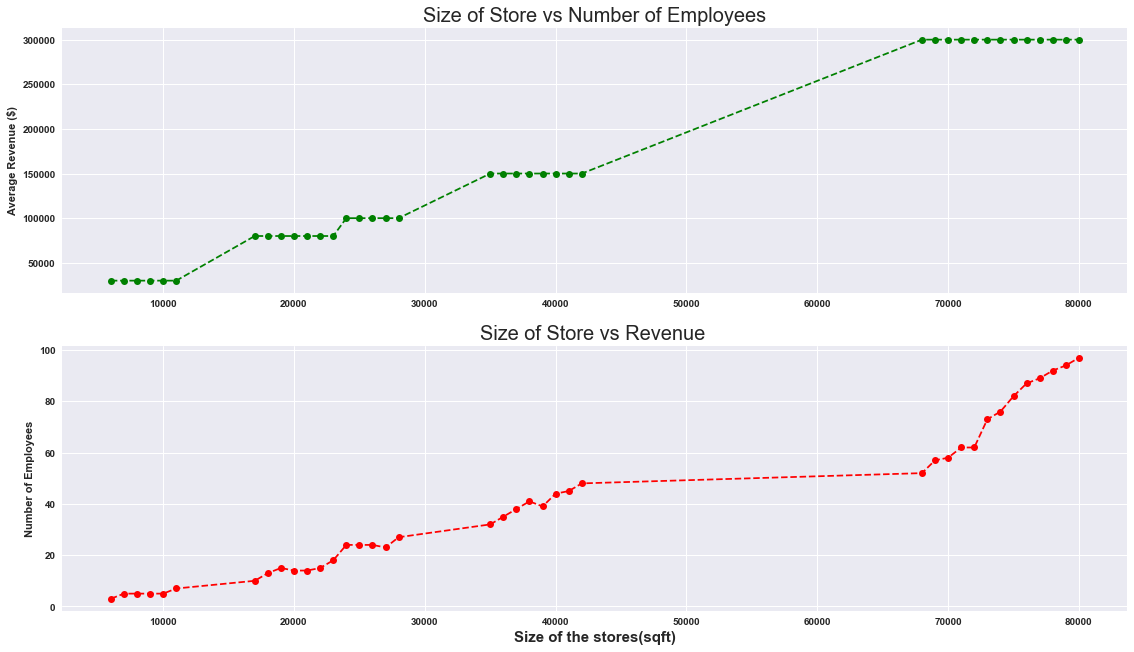

In [ ]:

# Visualising in separate 'x' axes for duration and year the relationship between store trading duration and annual revenue.
fig,ax = plt.subplots(2,1, sharey = False)

Store_details = ax[0].plot(EmployeeSizeRevenue['Size'],EmployeeSizeRevenue['Average_Revenue'], color = 'green', linestyle = '--', marker = 'o')

Year_Revenue = ax[1].plot(EmployeeSizeRevenue['Size'],EmployeeSizeRevenue['Avg_num_employees'], color = 'red',linestyle ='--', marker ='o')

ax[0].set_ylabel("Average Revenue ($)")

ax[1].set_ylabel("Number of Employees")

ax[1].set_xlabel('Size of the stores(sqft)', fontsize = 15)

ax[0].set_title('Size of Store vs Number of Employees', fontsize = 20)

ax[1].set_title('Size of Store vs Revenue ', fontsize = 20)

plt.style.use('seaborn')

fig.set_size_inches([17,10])

fig.savefig('Store size vs Revenue & Store size vs Number of Employees.png')
Store_details

Correlation1 = np.corrcoef(EmployeeSizeRevenue['Avg_num_employees'], EmployeeSizeRevenue['Size'])
print(Correlation1)

Correlation2 = np.corrcoef(EmployeeSizeRevenue['Average_Revenue'], EmployeeSizeRevenue['Size'])
print(Correlation2)